In [30]:
import numpy as np
import matplotlib.pyplot as plt
vees= np.loadtxt('raw_data_excitation_energy.txt')
timefs=vees[:,0]
time=vees[:,0]*41.341374575751 #fs to au
energy=vees[:,1]
print(time)
print(energy)


[0.00000000e+00 8.26827492e+01 1.65365498e+02 ... 3.30482948e+05
 3.30565631e+05 3.30648314e+05]
[3.374949   3.40183799 3.43722316 ... 3.62750178 3.63919561 3.61338717]


In [31]:
t=time[1:]
print(t)

[8.26827492e+01 1.65365498e+02 2.48048247e+02 ... 3.30482948e+05
 3.30565631e+05 3.30648314e+05]


In [32]:
t2=-t
print(t2)

[-8.26827492e+01 -1.65365498e+02 -2.48048247e+02 ... -3.30482948e+05
 -3.30565631e+05 -3.30648314e+05]


In [33]:
t3=t2[::-1]

In [34]:
t3 = np.append(t3, time)
print(t3)

[-330648.31385686 -330565.6311077  -330482.94835855 ...  330482.94835855
  330565.6311077   330648.31385686]


In [35]:
len(t3)

7999

In [36]:
#2
#convert vee from ev to au
energy=energy/27.211324570273

print(energy)

[0.12402737 0.12501552 0.12631591 ... 0.13330853 0.13373828 0.13278983]


In [37]:
#3 calculate avg vee and get vee fluctuations
mean=np.mean(energy)
fluctuation=energy-mean
len(fluctuation)

4000

In [38]:
acf=np.correlate(fluctuation,fluctuation,mode='full')/len(fluctuation)
print(acf)

[-4.54529646e-09 -9.53462455e-09 -1.26138092e-08 ... -1.26138092e-08
 -9.53462455e-09 -4.54529646e-09]


In [39]:
print(300*41.341374575751) #convert 300 fs to au

12402.412372725299


In [40]:
#damping function
damp = np.exp(-np.abs(t3)/12402.412372725299)
print(damp)   

[2.64063948e-12 2.65830256e-12 2.67608378e-12 ... 2.67608378e-12
 2.65830256e-12 2.64063948e-12]


<function matplotlib.pyplot.show(close=None, block=None)>

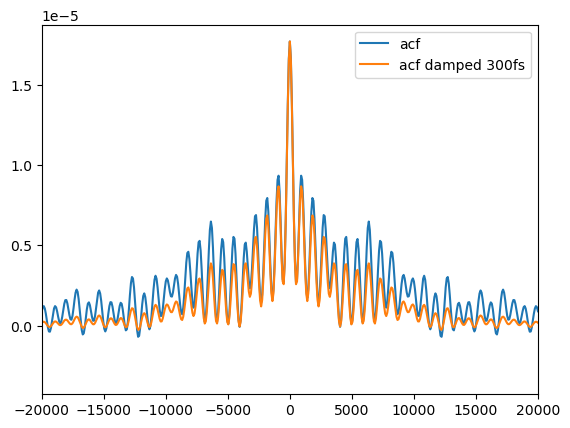

In [41]:
plt.plot(t3,acf,label='acf')
plt.plot(t3,damp*acf, label='acf damped 300fs')
plt.legend()
plt.xlim(-20000,20000)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

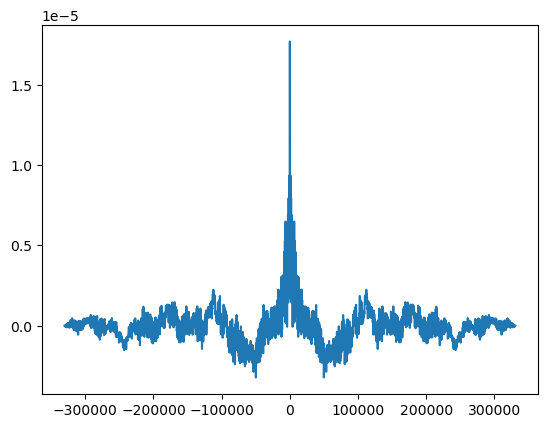

In [42]:
plt.plot(t3,acf)
plt.show

In [43]:
len(acf)

7999

In [44]:
#beta
k = 1.380649e-23
T = 300
b = 1/(k*T)
b = b*4.359744e-18 #convert to au
print(b)

1052.5832416493981


In [45]:
print(time)

[0.00000000e+00 8.26827492e+01 1.65365498e+02 ... 3.30482948e+05
 3.30565631e+05 3.30648314e+05]


In [46]:
len(time)

4000

In [47]:
print(acf)
len(acf)

[-4.54529646e-09 -9.53462455e-09 -1.26138092e-08 ... -1.26138092e-08
 -9.53462455e-09 -4.54529646e-09]


7999

In [48]:
len(acf[3999:])

4000

In [49]:
w2 = list(range(0, 4001, 1)) #in wavenumber
#print(w)


In [50]:
len(time)

4000

In [51]:
len(acf[3999:])

4000

In [52]:
w = np.arange(0, 4001, 1)#in wavenumber
w=w*0.0000046 #in au

In [53]:
#trapezoidial J(w) spectral density
dt=t3[1]-t3[0]
f=np.zeros(len(t3))
Jw=np.zeros(len(w))
for i in range(len(w)):
    f=np.exp(complex(0, 1)*w[i]*t3)*damp*acf
    Jw[i] = np.trapz(f, dx=dt)
print(Jw)


C:\Users\11235\AppData\Local\Temp\ipykernel_21808\3922449627.py:7: ComplexWarning: Casting complex values to real discards the imaginary part
  Jw[i] = np.trapz(f, dx=dt)


[6.17845208e-02 6.17971511e-02 6.18326126e-02 ... 1.69015934e-05
 1.68800380e-05 1.68535741e-05]


In [155]:
Jwnew=(b*w/2)*Jw
print(Jwnew)

[0.         0.00014961 0.00029939 ... 0.00016359 0.00016342 0.00016321]


(0.0, 2000.0)

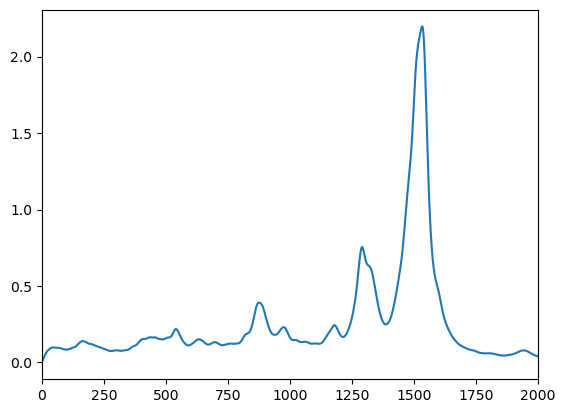

In [156]:
plt.plot(w*220000,Jwnew*27.2113) #multiply by 220000 to wavenumber multiply by 27.2113 to go to eV
plt.xlim(0,2000)

(0.0, 2.5)

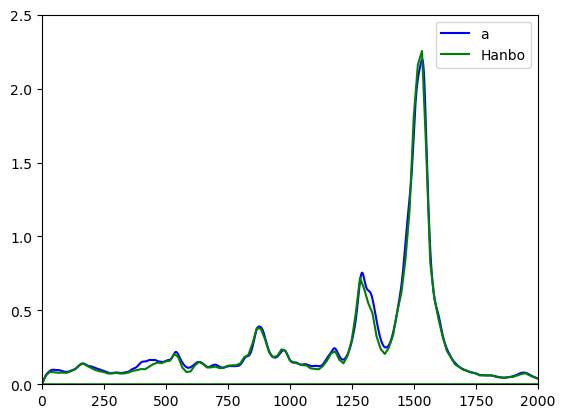

In [176]:
plt.plot(w*220000,Jwnew*27.2113, color='blue', label='a') #divide by 0.0000046 to wavenumber multiply by 27.2113 to go to eV
plt.plot(xsdh,Jh*27.2113, color='green', label='Hanbo')
#plt.plot(xsdh,Jh*27)
plt.legend()
plt.xlim(0,2000)
plt.ylim(0,2.5)


In [165]:
1+1

2

In [172]:
len(Jh)

1001

In [67]:
dw=w[1]-w[0]
print(dw)

4.6e-06


In [68]:
#cumulant g(t) real
gtreal = np.zeros(len(t3))
for i in range(len(t3)):
    real=np.zeros(len(w))
    real[0]=1
    real[1:]=(Jwnew[1:]/(w[1:]*w[1:]))*(1 / np.tanh((b*w[1:])/ 2))*(1-np.cos(w[1:]*t3[i]))*(1/np.pi)
    gtreal[i]=np.trapz(real,dx=dw)
print(gtreal)

[7637.6407215  7636.32293752 7635.00484452 ... 7635.00484452 7636.32293752
 7637.6407215 ]


(0.0, 1.0)

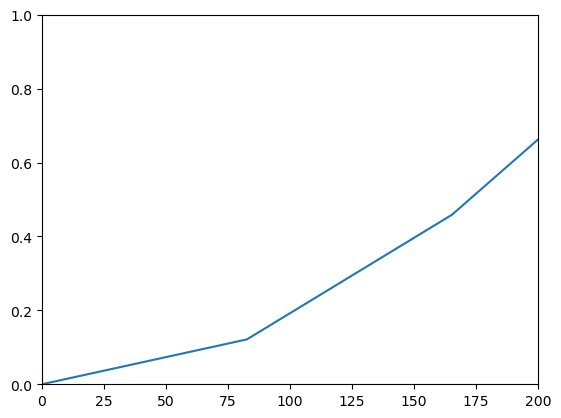

In [69]:
plt.plot(t3,gtreal)
plt.xlim([0,200])
plt.ylim([0,1])

(0.0, 3.0)

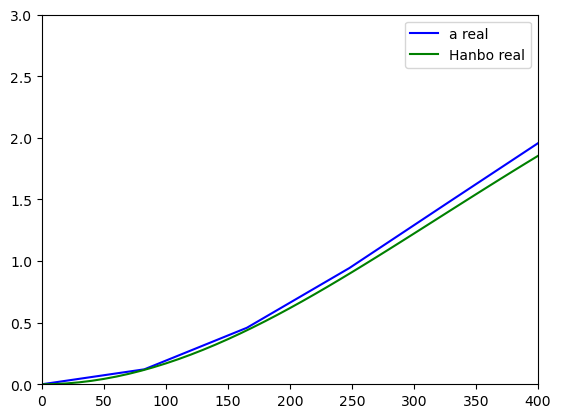

In [177]:
plt.plot(t3,gtreal, color='blue', label='a real')
plt.plot(gtht,gthr, color='green', label='Hanbo real')
plt.legend() # femtosecond to au41.341374575751 
plt.xlim([0,400])
plt.ylim([0,3])

In [178]:
#cumulant g(t) imag
gtimag= np.zeros(len(t3))
for i in range(len(t3)):
    imag=np.zeros(len(w))
    imag[0]=1
    imag[1:]=(Jwnew[1:]/(w[1:]*w[1:]))*(np.sin(w[1:]*t3[i])-(w[1:]*t3[i]))*(1/np.pi)
    gtimag[i]=np.trapz(imag,dx=dw)
print(gtimag)

[ 3051.75781187  3050.99061648  3050.22342041 ... -3050.22341581
 -3050.99061188 -3051.75780727]


In [194]:
#cumulant g(t) 
gt =gtreal+gtimag
print(gt)

[10689.39853337 10687.313554   10685.22826492 ...  4584.78142871
  4585.33232565  4585.88291422]


In [180]:
len(gt)

7999

(0.0, 1.0)

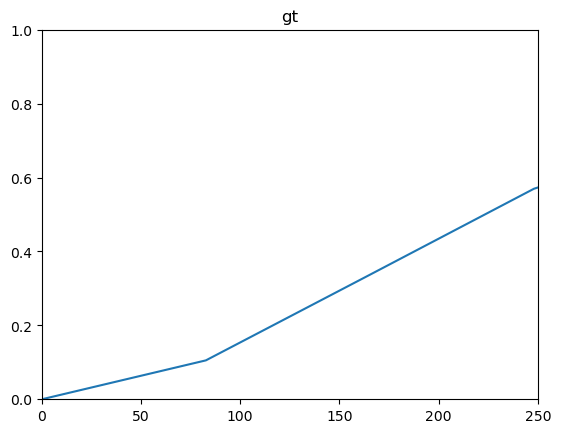

In [184]:
plt.plot(t3,gt)
plt.title('gt')
plt.xlim([0,250])
plt.ylim([0,1])

In [193]:
#response function
response=np.exp(-complex(0,1)*mean*t3)*np.exp(-gt)
print(response)

[ 0.-0.j  0.+0.j -0.+0.j ... -0.+0.j  0.+0.j  0.+0.j]


In [186]:
len(response)

7999

In [190]:
print(response)

[-0.+0.j  0.-0.j  0.+0.j ...  0.+0.j -0.+0.j  0.-0.j]


(-1.0, 2.0)

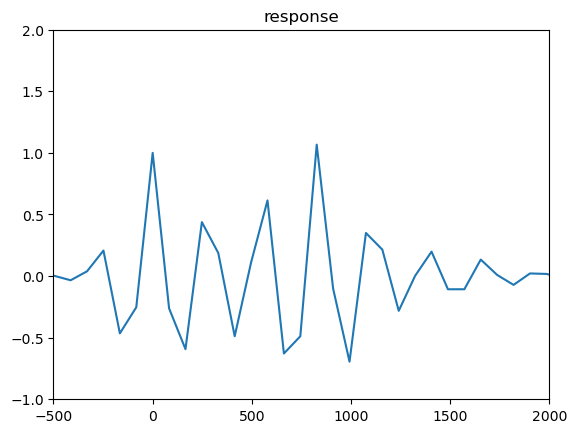

In [191]:
plt.plot(t3,response)
plt.title('response')
plt.xlim([-500,2000])
plt.ylim([-1,2])

In [78]:
len(response)

NameError: name 'response' is not defined

In [195]:
#trapezoidial absorbance
dt=t3[1]-t3[0]
f2=np.zeros(len(t3))
absw=np.zeros(len(w))
for i in range(len(w)):
    f2=np.exp(-complex(0, 1)*w[i]*t3)*response
    absw[i] = np.trapz(f2, dx=dt)
print(absw)

C:\Users\11235\AppData\Local\Temp\ipykernel_22400\356765691.py:7: ComplexWarning: Casting complex values to real discards the imaginary part
  absw[i] = np.trapz(f2, dx=dt)


[  4.29406463   4.29958253   4.30510715 ... 261.48444416 261.65675732
 261.82908751]


In [80]:
absw=absw
print(absw)

[0. 0. 0. ... 0. 0. 0.]


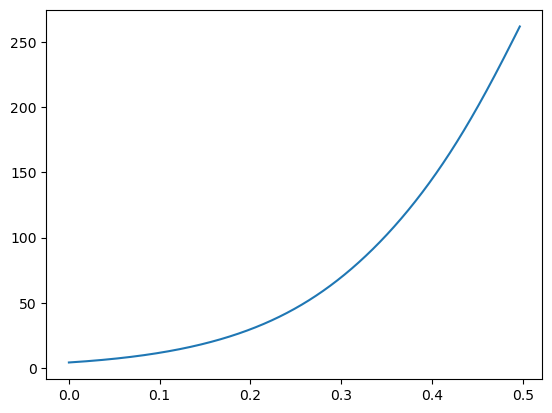

In [198]:
plt.plot(w*27,absw) #divide by 0.0000046 to wavenumber multiply by 27.2113 to go to eV
#plt.xlim(0,10)

In [82]:
Jwnew=(b*w/2)*Jw
print(Jwnew)

[0.         0.00014961 0.00029939 ... 0.00016359 0.00016342 0.00016321]


In [83]:
#trapezoidial J(w) spectral density
dt=t3[1]-t3[0]
f=np.zeros(len(t3))
Jw=np.zeros(len(w))
for i in range(len(w)):
    f=np.exp(complex(0, 1)*w[i]*t3)*damp*acf
    Jw[i] = np.trapz(f, dx=dt)
print(Jw)


C:\Users\11235\AppData\Local\Temp\ipykernel_22400\3922449627.py:7: ComplexWarning: Casting complex values to real discards the imaginary part
  Jw[i] = np.trapz(f, dx=dt)


[6.17845208e-02 6.17971511e-02 6.18326126e-02 ... 1.69015934e-05
 1.68800380e-05 1.68535741e-05]


(-1.0, 3.0)

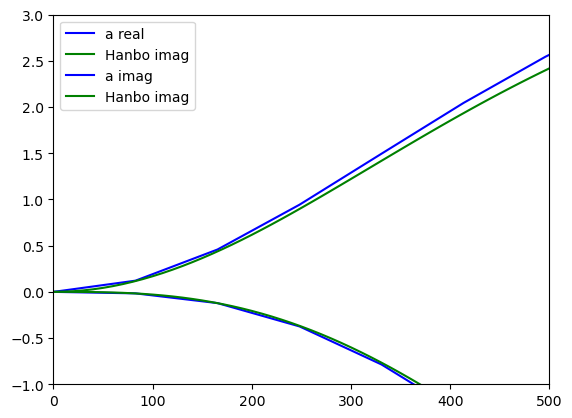

In [183]:
plt.plot(t3,gtreal, color='blue', label='a real')
plt.plot(gtht,gthr, color='green', label='Hanbo imag')
plt.plot(t3,gtimag, color='blue', label='a imag')
plt.plot(gtht,gthi, color='green', label='Hanbo imag')
plt.legend() # femtosecond to au41.341374575751 
plt.xlim([0,500])
plt.ylim([-1,3])

In [ ]:
plt.plot(gtht,gthi, color='blue', label='Hanbo imag')
plt.plot(gtht,gthr, color='green', label='Hanbo real')
plt.legend() # femtosecond to au41.341374575751 
plt.xlim([0,400])
plt.ylim([-1,3])

# 

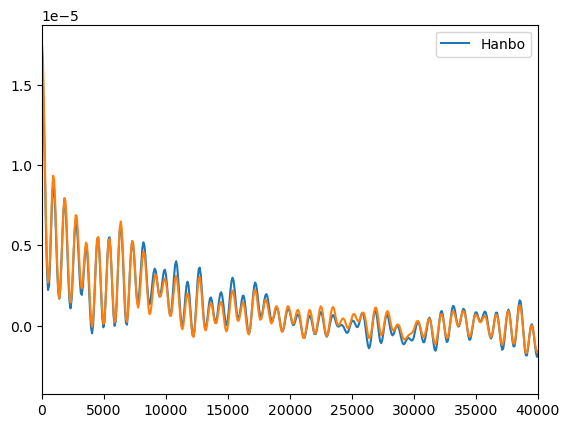

In [158]:
#Hanbos
htcf= np.loadtxt('Cct_aut_ha2_undamped.txt')
xhtcf = htcf[:,0]
yhtcf = htcf[:,1]
plt.xlim(0,40000)
#plt.ylim(0,0.09)
plt.plot(xhtcf,yhtcf,label='Hanbo')
plt.plot(time,acf[3999:])
plt.legend()

plt.show()


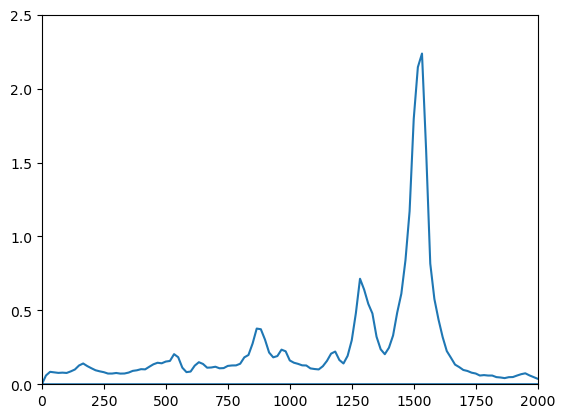

In [170]:
#Hanbos
sdh= np.loadtxt('Jw_auw_ha.txt')
xsdh = 219474.63068*sdh[:,0]
Jh = sdh[:,1]
plt.xlim(0,2000)
plt.ylim(0,2.5)
plt.plot(xsdh,Jh*27)
plt.show()


In [171]:
len(xsdh)

1001

In [173]:
len(Jh)

1001

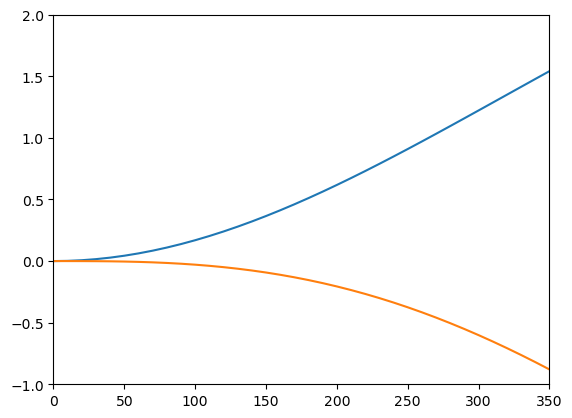

2001

In [160]:
#Hanbos
gth= np.loadtxt('gt_aut_unitless.txt')
gtht = gth[:,0]
gthr= gth[:,1]
gthi=gth[:,2]
plt.plot(gtht,gthr) # femtosecond to au41.341374575751
plt.plot(gtht,gthi)
plt.xlim([0,350])
plt.ylim([-1,2])
plt.show()
len(gtht)

In [161]:
Iw_auw_aut_true

NameError: name 'Iw_auw_aut_true' is not defined

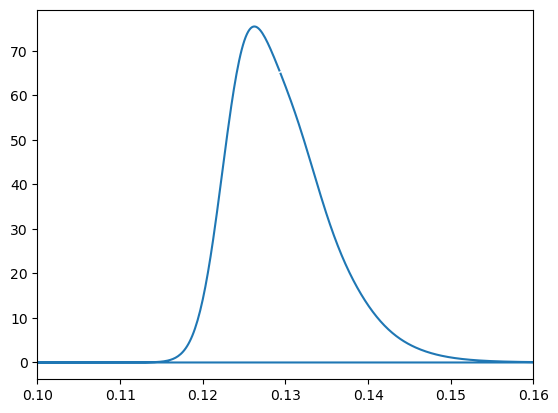

In [162]:
#Hanbos
Iwh= np.loadtxt('Iw_auw_aut_true.txt')
xsdh = Iwh[:,0]
Ih = Iwh[:,1]
plt.xlim(0.1,0.16)
#plt.ylim(0,0.4)
plt.plot(xsdh,Ih)
plt.show()


In [163]:
print(gthi)

[ 0.00000000e+00 -3.09751387e-05 -2.47308378e-04 ... -1.58313074e+02
 -1.58399587e+02 -1.58486119e+02]


In [ ]:
len(energy)

In [ ]:
print(b)

In [ ]:
import math
import numpy as np
(Jh[1])/(xh[1]**2)*((1 / math.tan(b/ 4))*math.cos(1-xh[1]*1)-(math.sin(xh[1]*1)-xh[1]*1).imag)

In [ ]:
#real
(Jh[1])/(xh[1]**2)*((1 / math.tan(b/ 4))*math.cos(1-xh[1]*1))


In [ ]:
#real
(1/math.pi)*((Jh[1:])/(xh[1:]**2))*((1 / math.tanh((b*xh[1:])/ 2))*math.cos(1-xh[1:]*1))


In [ ]:
w = list(range(0, 4001, 1))
#print(w)
len(w)

In [ ]:
len(gtht)

In [ ]:

dt=time[1]-time[0]
f=np.zeros(len(time))
Jw=np.zeros(len(w))
for i in range(len(w)):
    f=np.exp(complex(0, 1)*w[i]*time)*acf[3999:]
    Jw[i] = np.trapz(f, dx=dt)

print(Jw)


In [ ]:
#real
(1/math.pi)*((Jh[1])/(xh[1]**2))*((1 / math.tanh((b*xh[1])/ 2))*math.cos(1-xh[1]*1))


In [ ]:
(Jh[1])/(xh[1]**2)*math.cos(xh[1]*1)

In [ ]:
print(((Jh[1])/(xh[1]**2)))

In [ ]:
gt_aut_unitless